In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [9]:
population = np.random.randint(0,10,(6,4))
population

array([[7, 7, 8, 5],
       [1, 9, 8, 1],
       [6, 6, 9, 1],
       [9, 4, 6, 6],
       [5, 1, 1, 2],
       [4, 7, 8, 7]])

In [0]:
def fitness(matrix):
  cof = np.array([1,2,3,4])
  res = np.sum(cof * matrix,axis=1,keepdims=True)
  return np.absolute(res - 30)

In [0]:
def fitprob(matrix):
  res = fitness(matrix)
  summ =  np.sum(res,keepdims=True)
  return   1 - (res / summ)

In [12]:
vector = fitness(population)
print(vector)
vector = fitprob(population)
print(vector)


[[35]
 [17]
 [19]
 [29]
 [12]
 [40]]
[[0.76973684]
 [0.88815789]
 [0.875     ]
 [0.80921053]
 [0.92105263]
 [0.73684211]]


In [13]:
# def select(matrix,vector):
#   new_v = np.array([[vector[i].tolist(),i] for i in range(vector.shape[0])])
#   r = new_v[new_v[:,0].argsort()[::-1]]
#   res = r[:int(vector.shape[0]//2)]
#   new_pop = np.array([matrix[i] for i in res[:,1]])
#   return new_pop
# select(population,vector)
def select(matrix,vector):
  shape0 = matrix.shape[0]
  drop_prob = ( np.random.uniform(size=(shape0,1)) <= vector)
  matrix = np.array([matrix[i,:] for i in range(shape0) if drop_prob[i]])
  return matrix
select(population,vector)
  

array([[7, 7, 8, 5],
       [1, 9, 8, 1],
       [6, 6, 9, 1],
       [9, 4, 6, 6],
       [5, 1, 1, 2],
       [4, 7, 8, 7]])

In [14]:
def round_up_to_even(f):
  return math.ceil(f / 2.) * 2
def crossover(matrix):
  shape0 = matrix.shape[0]
  shape1 = matrix.shape[1]
  nb_cross = round_up_to_even(shape0)
  to_cross = np.random.randint(0,shape0,(nb_cross,2))
  crossed = np.array([np.concatenate((matrix[ind[0],:2],matrix[ind[1],2:])) for ind in to_cross])
  matrix = np.append(matrix, crossed, axis=0)
  return matrix
crossover(population)

array([[7, 7, 8, 5],
       [1, 9, 8, 1],
       [6, 6, 9, 1],
       [9, 4, 6, 6],
       [5, 1, 1, 2],
       [4, 7, 8, 7],
       [7, 7, 1, 2],
       [4, 7, 8, 1],
       [4, 7, 1, 2],
       [7, 7, 1, 2],
       [4, 7, 8, 5],
       [7, 7, 8, 5]])

In [15]:
def mutation(matrix):
  probability = 0.2
  shape0 = matrix.shape[0]
  shape1 = matrix.shape[1]
  p_mutate = (np.random.uniform(size=(shape0,1)) <= probability)
  for i in range(shape0):
    if (p_mutate[i] == True):
      random_num = np.random.randint(0,30)
      random_col = np.random.randint(0,shape1)
      matrix[i,random_col] = random_num
  return matrix

mutation(population)


array([[ 7,  7,  8,  5],
       [ 1,  9,  8,  1],
       [ 6, 23,  9,  1],
       [ 9,  4,  6,  1],
       [ 5,  1,  1,  2],
       [ 4,  7,  8,  7]])

(10, 4)
(18, 4)
(36, 4)
(71, 4)
(142, 4)
(282, 4)
(563, 4)
(1127, 4)
(2255, 4)
(4510, 4)
[array([41]), array([20]), array([25]), array([18]), array([18]), array([6]), array([6]), array([3]), array([1]), array([1]), array([0])]


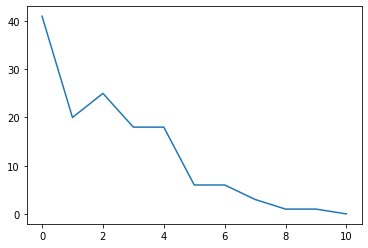

In [21]:
def train(generation = 100):
  population = np.random.randint(0,30,(10,4))
  matrix = population
  fitness_list = [min(fitness(population))]
  for i in range(generation):
    print(matrix.shape)
    matrix = crossover(matrix)
    matrix = mutation(matrix)
    vector = fitprob(matrix)
    fitness_list.append(min(fitness(matrix)))
    matrix = select(matrix,vector)
  return matrix,fitness_list
population,fitness_list = train(10)
print(fitness_list)
plt.plot(fitness_list)